In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import common
from common.data_parser import *
from config import *


In [10]:
df_list = parse_companies()

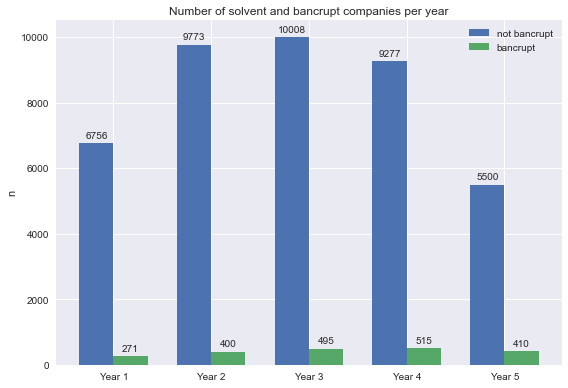

In [11]:
plt.style.use("seaborn")
labels = ["Year 1", "Year 2", "Year 3", "Year 4", "Year 5"]
not_bancrupt = [df["class"].value_counts()[0] for df in df_list]
bancrupt = [df["class"].value_counts()[1] for df in df_list]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, not_bancrupt, width, label='not bancrupt')
rects2 = ax.bar(x + width/2, bancrupt, width, label='bancrupt')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('n')
ax.set_title('Number of solvent and bancrupt companies per year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


plt.savefig("out/companies_histrogram")
plt.show()

In [28]:
missing_vals = 0
for df in df_list:
    for i in range(1,65):
        series =  df["Attr"+str(i)].isnull()
        for entry in series:
            if entry == True:
                missing_vals += 1

total_vals = 0
for df in df_list:
    total_vals += df.size

print("Total number of values: " + str(total_vals))
print("Number of missing values: " + str(missing_vals))
print("per cent: " + str(100*missing_vals / float(total_vals)) + "%")

Total number of values: 2821325
Number of missing values: 41322
per cent: 1.464630980124587%
